In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

#import keras
# Helper libraries
import numpy as np

print(tf.__version__)

C:\Users\kales\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kales\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kales\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kales\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

1.14.0


In [3]:
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D


Using TensorFlow backend.


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels
test_images.shape

(10000, 28, 28)

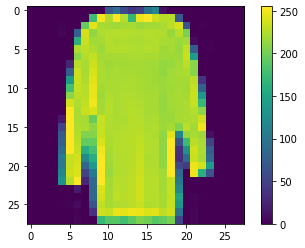

In [8]:
plt.figure()
plt.imshow(train_images[350])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

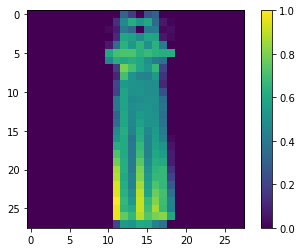

In [10]:
plt.imshow(train_images[250])
plt.colorbar()

In [11]:
print(type(train_images),np.shape(train_images))

<class 'numpy.ndarray'> (60000, 28, 28)


In [12]:
import cv2

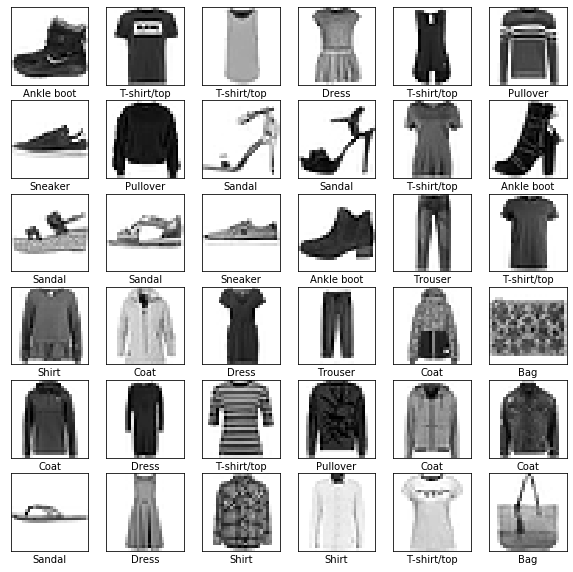

In [13]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model_1 = Sequential()
model_1.add(Flatten(input_shape=(28, 28)))
model_1.add(Dense(128, activation='relu'))

model_1.add(Dense(10, activation='softmax'))

In [ ]:
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_1.fit(train_images, train_labels, epochs=10)

In [ ]:
model_1.save('fashion_model.h5')

In [14]:
from keras.models import load_model
model_1 = tf.keras.models.load_model('fashion_model.h5')

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Jul/2020 13:32:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Jul/2020 13:32:24] "GET /1.jpg HTTP/1.1" 404 -


C:/Users/kales/fashion_f/static/i_1.jpg
(406, 612)
(28, 28)
(1, 28, 28)
[8]


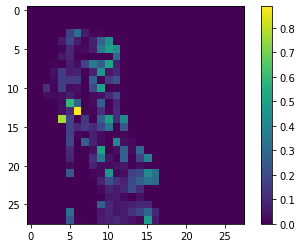

127.0.0.1 - - [10/Jul/2020 13:32:39] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [10/Jul/2020 13:32:40] "GET /static/i_1.jpg HTTP/1.1" 200 -
127.0.0.1 - - [10/Jul/2020 13:32:40] "GET /1.jpg HTTP/1.1" 404 -


In [21]:
from flask import Flask, render_template, request, redirect, flash, url_for
import cv2

app = Flask(__name__,static_folder ='')


@app.route('/')
def home():
      return render_template('index.html')
    
@app.route('/', methods=['GET','POST'])
def tab():
    #CATEGORIES = ["Brain"]
    
    import tensorflow as tf

    from tensorflow import keras
    from tensorflow.keras import datasets,layers,models
    #K.clear_session()
    from keras.models import load_model
    model_1 = tf.keras.models.load_model('fashion_model.h5')
    forward_message = request.form['fileupload']
    input1='C:/Users/kales/fashion_f/static/' + forward_message
    print(input1)
    path='static/'+ forward_message 
    #path = forward_message
    IMG_SIZE = 28
    img_array = cv2.imread(input1,cv2.IMREAD_GRAYSCALE)
    print(np.shape(img_array))
    img_array = img_array/255.0
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    print(np.shape(new_array))
    plt.imshow(new_array)
    plt.colorbar()
    #print(td)
    input1 = new_array.reshape(-1,IMG_SIZE, IMG_SIZE)
    input1 =np.abs(1-input1) 
    print(np.shape(input1))
    graph = tf.get_default_graph()
    with graph.as_default():
        pred= model_1.predict_classes(input1)
    print(pred)
     
    if pred == 0:
        var  = 'It is T-shirt/top'   
    if pred == 1:
        var = 'It  is Trouser'
    if pred == 2:
        var = 'It is Pullover'
    if pred == 3:
        var = 'It is Dress'
    if pred == 4:
        var = 'It is Coat'
    if pred == 5:
        var = 'It is Sandal'
    if pred == 6:
        var = 'It is Shirt'
    if pred == 7:
        var = 'It is Sneaker'
    if pred == 8:
        var = 'It is Bag'
    if pred == 9:
        var = 'It is Ankle boot'
    
    
    return render_template('index.html',var=var,image=path,td=plt.show())
    
if __name__ == '__main__':
    app.run()

In [ ]:
num=460
imgg=train_images[num]
test_img=np.reshape(imgg,(1,28,28))
print(np.shape(test_img))
#plt.imshow(np.squeeze(test_img))
result=model_1.predict_classes(test_img)
plt.figure(figsize=(1,1))
plt.imshow(imgg)
#print(result,Y_test[0])
print(result)
y=np.array(train_labels)
y[num]
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
import pyautogui
if result == 0:
    pyautogui.alert('It is T-shirt/top')
if result == 1:
    pyautogui.alert('It  is Trouser')
if result == 2:
    pyautogui.alert('It is Pullover')
if result == 3:
    pyautogui.alert('It is Dress')
if result == 4:
    pyautogui.alert('It is Coat')
if result == 5:
    pyautogui.alert('It is Sandal')
if result == 6:
    pyautogui.alert('It is Shirt')
if result == 7:
    pyautogui.alert('It is Sneaker')
if result == 8:
    pyautogui.alert('It is Bag')
if result == 9:
    pyautogui.alert('It is Ankle boot')
    

    